In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("clean_reviews.csv", sep='|', header=0)
df["date"] = pd.to_datetime(df['date'])
df["day"] = df.date.dt.day
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
display(df.dtypes)


item              object
date      datetime64[ns]
user              object
rating             int64
itemID             int64
day                int32
month              int32
year               int32
dtype: object

<Axes: ylabel='Frequency'>

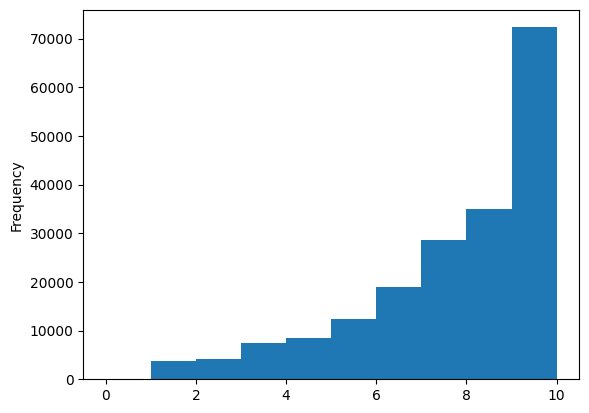

In [19]:
df.rating.plot.hist()

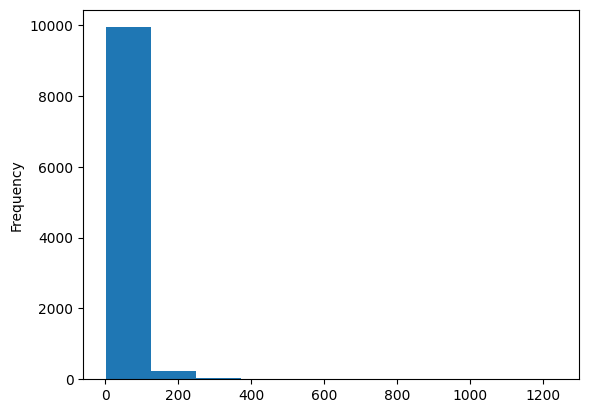

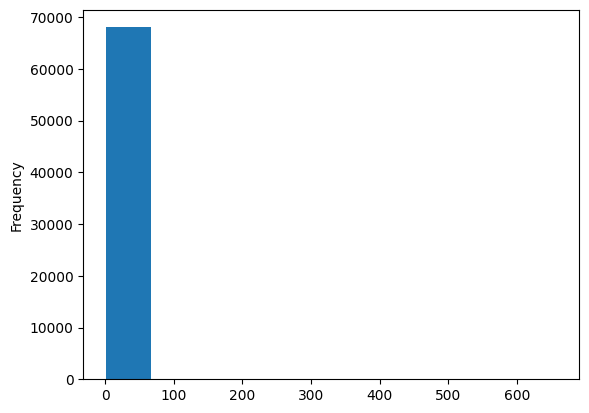

In [20]:
df.groupby("item").agg("count")['rating'].plot.hist()
plt.show()
df.groupby("user").agg("count")['rating'].plot.hist()
plt.show()

In [21]:
print(f"The earlies review is from {df.date.min()}")

The earlies review is from 2006-11-07 00:00:00


In [22]:
df.groupby("item").count().sort_values(by=['rating'], ascending=False)["rating"]

item
Sword Art Online                    1236
Death Note                          1113
Steins;Gate                          993
Shigatsu wa Kimi no Uso              965
Angel Beats!                         949
                                    ... 
Honoo no Mirage: Muyou no Michi        1
Shinshuu Sudama-hen                    1
Honoo no Toukyuuji: Dodge Danpei       1
Days                                   1
Kitty to Mimmy no Happy Birthday       1
Name: rating, Length: 10260, dtype: int64

In [23]:
print(f"There is a total of {len(df)} ratings")
print(f"There are {len(df.user.unique())} unique users")
print(f"There are {len(df.item.unique())} unique items")

There is a total of 190913 ratings
There are 68182 unique users
There are 10261 unique items


In [24]:
df = df.groupby('user').filter(lambda x: len(x) >= 10)
# df = df.groupby('item').filter(lambda x: len(x) >= 10)
print(f"There is now a total of {len(df)} ratings")
print(f"There are now {len(df.user.unique())} unique users")
print(f"There are now {len(df.item.unique())} unique items")

There is now a total of 72322 ratings
There are now 2808 unique users
There are now 8205 unique items


<Axes: ylabel='Frequency'>

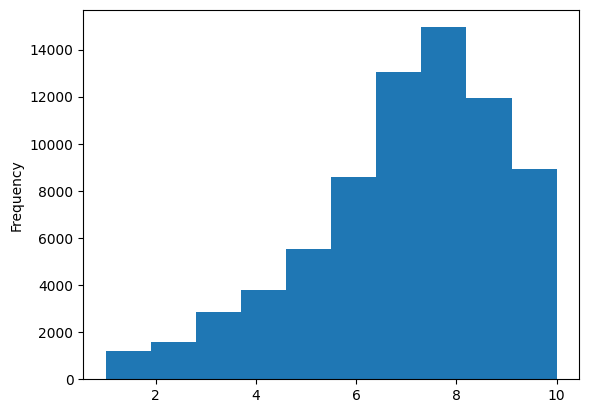

In [25]:
df.rating.plot.hist()

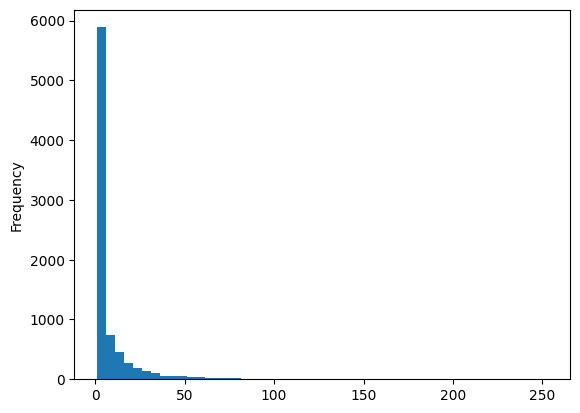

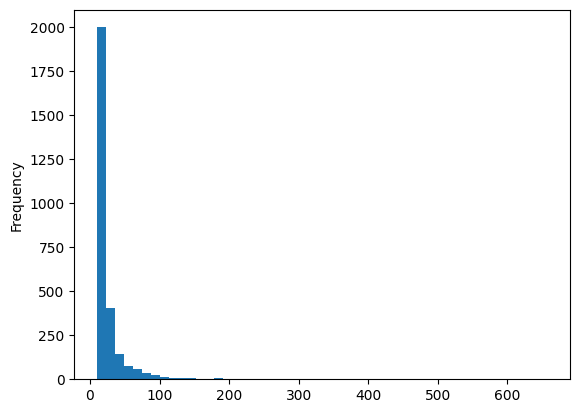

In [26]:
df.groupby("item").agg("count")['rating'].plot.hist(bins=50)
plt.show()
df.groupby("user").agg("count")['rating'].plot.hist(bins=50)
plt.show()

In [27]:
df.groupby("user").count().sort_values(by=['rating'], ascending=False)['rating']

user
Stark700          658
ktulu007          622
Sidewinder51      612
LegendAqua        528
KANLen09          462
                 ... 
GreyGaming         10
DisarmingStar0     10
AnimeGuy00         10
gaysocks           10
Chocosword         10
Name: rating, Length: 2808, dtype: int64

In [28]:
pd.concat([
    df.groupby("item").mean('rating')['rating'],
    df.groupby("item").count()['rating'],
], axis=1).set_axis(['avg', 'count'], axis=1).sort_values(by=['avg', "count"],ascending=False)

,avg,count
item,,
Da Li Si Rizhi,10.0,2
Iya na Kao sare nagara Opantsu Misete Moraitai 2,10.0,2
Murenase! Seton Gakuen Special,10.0,2
Shinkansen Henkei Robo Shinkalion The Animation,10.0,2
Stretta The Animation,10.0,2
...,...,...
Triangle Blue,1.0,1
Wolf Guy,1.0,1
YU-NO,1.0,1


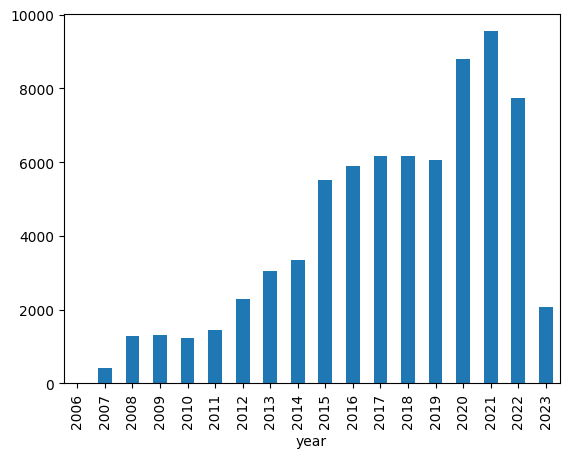

In [29]:
df.groupby(['year'])['rating'].count().plot.bar()
plt.show()
